In [1]:
def read_data(filename):

    date = []
    temp = []

    with open(filename, 'r') as f:

        lines = f.readlines()[19:]

        for line in lines:
            date.append(line.split(',')[2])
            temp.append(int(line.split(',')[3]))
    
    return [date, temp]

In [2]:
max_dates, max_temps = read_data('DeBiltTempMaxOLD.txt')
min_dates, min_temps = read_data('DeBiltTempMinOLD.txt')

In [3]:
def min_fct(ls):
    min_ls = ls[0]
    for i in range(1, len(ls)):
        if ls[i] < min_ls:
            min_ls = ls[i]
    return min_ls

def max_fct(ls):
    max_ls = ls[0]
    for i in range(1, len(ls)):
        if ls[i] > max_ls:
            max_ls = ls[i]
    return max_ls

In [4]:
def get_highest_temp(max_dates, max_temps):
    return [max_dates[max_temps.index(max_fct(max_temps))], max_fct(max_temps)]

def get_lowest_temp(min_dates, min_temps):
    return [min_dates[min_temps.index(min_fct(min_temps))], min_fct(min_temps)]

In [5]:
highest_temp_date, highest_temp = get_highest_temp(max_dates, max_temps)
lowest_temp_date, lowest_temp = get_lowest_temp(min_dates, min_temps)

In [6]:
def longest_streak(lst):
    # initialize variables to keep track of the current and longest streaks
    current_streak = 0
    longest_streak = 0
    longest_streak_index = 0

    # iterate through the list
    for i, num in enumerate(lst):
        # if the current number is negative, increment the current streak
        if num < 0:
            current_streak += 1
            # if the current streak is longer than the longest streak, update the longest streak and its index
            if current_streak > longest_streak:
                longest_streak = current_streak
#                 longest_streak_index = i - current_streak + 1
                longest_streak_index = i 
        # if the current number is not negative, reset the current streak
        else:
            current_streak = 0

    return [longest_streak, longest_streak_index]

In [7]:
def get_longest_freezing(max_dates, max_temps):
    return [longest_streak(max_temps)[0], max_dates[longest_streak(max_temps)[1]]]

In [8]:
get_longest_freezing(max_dates, max_temps)

[21, '19470224']

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(list(zip(max_dates, max_temps)), columns=['max_dates', 'max_temps'])

In [12]:
df['year'] = df.max_dates.apply(lambda x: x[0:4])

In [19]:
sum(df.max_temps[df.year == "1901"] >= 250)

26

In [28]:
df_summer = pd.DataFrame()

for year in df.year.unique().tolist():
    summer_days = sum(df.max_temps[df.year == year] >= 250)
    
    df_dummy = pd.DataFrame({'year': year, 'summer_days': summer_days}, index=[0])
    
    df_summer = pd.concat([df_summer, df_dummy])

In [32]:
df_tropical = pd.DataFrame()

for year in df.year.unique().tolist():
    tropical_days = sum(df.max_temps[df.year == year] >= 300)
    
    df_dummy = pd.DataFrame({'year': year, 'tropical_days': tropical_days}, index=[0])
    
    df_tropical = pd.concat([df_tropical, df_dummy])

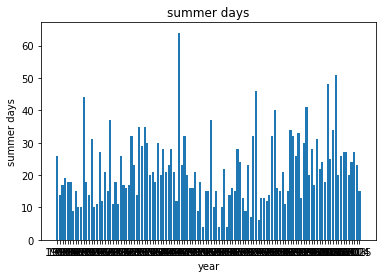

In [36]:
import matplotlib.pyplot as plt

plt.title('summer days')
plt.xlabel('year')
plt.ylabel('summer days')
plt.bar(df_summer.year, df_summer.summer_days)

plt.show()

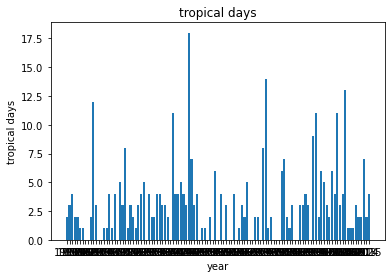

In [37]:
import matplotlib.pyplot as plt

plt.title('tropical days')
plt.xlabel('year')
plt.ylabel('tropical days')
plt.bar(df_tropical.year, df_tropical.tropical_days)

plt.show()

In [48]:
def check_consecutive_numbers(numbers):
  # Check if 5 consecutive numbers are higher than 250
    for i in range(len(numbers) - 4):
        if all(numbers[i + j] >= 250 for j in range(5)):
            return i

  # Check if 3 consecutive numbers are higher than 300
    for i in range(len(numbers) - 2):
        if all(numbers[i + j] >= 300 for j in range(3)):
            return i

    return 'Not found'

In [49]:
max_dates[check_consecutive_numbers(max_temps)]

'19010716'